# Engenharia de Características e Regressão Polinomial


### Atividade da Aula

- Aluno: **Augusto Mathias Adams**

1. **Rode todo o código. Certifique-se que você o compreendeu.**

Feito. De fato, é uma estratégia interessante para obter uma função polinomial (normalizada ou não) a partir de uma regressão linear (de fato, regressão linear múltipla). Desta forma, o método de regressão linear múltipla se estende para funções complexas, apenas fazendo a engenharia de características para os termos polinomiais ou transcendentes.

2. **Crie uma nova função alvo que possui pelo menos um termo polinomial de maior ordem (por exemplo, $x^4$ ) e modele-a fazendo as modificações necessárias no código.**

Claro!!

Faremos algo interessante.

  - Utilizaremos uma expansão em série de taylor da função $e^x$ até ordem 6:
    - $
      E_6(x) = \sum_{k=0}^{4} \frac{x^k}{k!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \frac{x^5}{5!} + \frac{x^6}{6!}
      $

  - Algoritmos implementados:
    - RMSProp
    - SGD (Gradiente Estocástico)
    - Gradiente Conjugado
    - Adam
    - Gradiente Descendente (Visto em Aula)

A solução se encontra na seção **Happy Hour** do presente notebook.
  

## Objetivos
Com este código você irá:
- explorar a Engenharia de Características e a regressão polinomial. Isso permite o uso de regressão linear para ajustar funções mais complexas (funções polinomiais, por exemplo).


In [567]:
!pip3 install tabulate
import math
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
np.set_printoptions(precision=3)  #Reduz precisão ao dar print das arrays numpy

## Engenharia de Características e Regressão Polinomial: Uma revisão

A regressão linear provê uma forma de construção de modelos do tipo:

$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b \tag{1}$$

O que acontece se suas características (seus dados) são não lineares ou combinações de múltiplas características? Por exemplo, pode ser que você descubra que o preço das casas é não linear com a área, penalizando casas muito pequenas ou casas muito grandes. Como construir um modelo que se ajusta a esse comportamento?


## Características Polinomiais

Nós estamos considerando aqui um cenário onde os dados têm um comportamento não linear. Vamos começar com uma função quadrática bastante simples: $y = 1+x^2$.

Abaixo nós criamos os dados:

In [568]:
# Criando os dados
x = np.arange(0, 20, 1) # resultado tem shape (20,)
y = 1 + x**2
X = x.reshape(-1,1) # resultado tem shape (20,1)


### Definindo funções já usadas em códigos anteriores

Na célula abaixo, nós definimos as funções que implementam o Método do Gradiente e mais algumas funções adicionais, como a função *normalizacao_zscore* (todas já foram vistas em atividades de programação anteriores).

In [569]:
def calcula_custo(X, y, w, b):
    """
    Calcula o custo
    Args:
      X (ndarray (m,n)): Dados, contendo m exemplos com n características
      y (ndarray (m,)) : valores alvo
      w (ndarray (n,)) : parâmetros w do modelo
      b (scalar)       : parâmetro b do modelo

    Retorna:
      custo (escalar): custo
    """
    m     = X.shape[0]
    custo = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = escalar (see np.dot)
        custo = custo + (f_wb_i - y[i])**2     # escalar
    custo = custo / (2 * m)                    # escalar
    return custo

def calcula_gradiente(X, y, w, b):
    """
    Calcula Gradiente para Regressão Linear
    Args:
      X (ndarray (m,n)): Dados, contendo m exemplos com n características
      y (ndarray (m,)) : valores alvo
      w (ndarray (n,)) : parâmetros w do modelo
      b (scalar)       : parâmetro b do modelo

    Retorna:
      dj_dw (ndarray (n,)): O gradiente da função custo com relação aos parâmetros w.
      dj_db (escalar):      O gradiente da função custo com relação ao parâmetro b.
    """
    m,n = X.shape           #(número de exemplos, número de características)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        erro = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + erro * X[i, j]
        dj_db = dj_db + erro
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

def metodo_do_gradiente(X, y, w_in, b_in, calcula_custo, calcula_gradiente, alpha, num_iters):
    """
    Performa Método do Gradiente para aprender theta. Atualiza theta ao longo de
    num_iters passos de iteração usando uma taxa de aprendizado alpha

    Args:
      X (ndarray (m,n))   : Dados, contendo m exemplos com n características
      y (ndarray (m,))    : valores alvo
      w_in (ndarray (n,)) : valores iniciais dos parâmetros w do modelo
      b_in (escalar)      : valor inicial do parâmetro b do modelo
      calcula_custo       : função que calcula o custo
      calcula_gradiente   : função que calcula o gradiente
      alpha (float)       : taxa de aprendizado
      num_iters (int)     : Número de iterações para o método do gradiente

    Retorna:
      w (ndarray (n,)) : Valores atualizados para os parâmetros w
      b (scalar)       : Valores atualizado para o parâmetro b
      """

    # Valores históricos
    J_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):

        # Calcula o gradiente
        dj_db,dj_dw = calcula_gradiente(X, y, w, b)

        # Atualiza os parâmetros
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Salva o custo
        if i<100000:
            J_history.append( calcula_custo(X, y, w, b))

        # Faz print de tempos em tempos
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteração {i:4d}: Custo {J_history[-1]:8.2f}   ")

    return w, b, J_history # retorna valores finais e históricos

def normalizacao_zscore(X):
    """
    Normaliza todas as colunas em X

    Argumentos:
      X (ndarray (m,n))     : Dados de entrada, m amostras (linhas), n características (colunas)

    Retorna:
      X_norm (ndarray (m,n)): Matriz X normalizada
      mu (ndarray (n,))     : média de cada característica
      sigma (ndarray (n,))  : desvio padrão de cada característica
    """
    # Encontrando a média de cada característica/coluna
    mu     = np.mean(X, axis=0)                 # mu terá shape (n,) ---> axis=0 indica que a operação será feita ao longo das linhas, para cada coluna
    # Encontrando o desvio padrão de cada característica/coluna
    sigma  = np.std(X, axis=0)                  # sigma terá shape (n,)
    # O comando abaixo subtrai a média mu de cada coluna para cada exemplo, e divide pelo desvio correspondente
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)


Abaixo estimamos uma reta $f_{w,b} = wx+b$ para esses dados:

Iteração    0: Custo  1657.56   
Iteração  200: Custo   588.48   
Iteração  400: Custo   490.10   
Iteração  600: Custo   456.43   
Iteração  800: Custo   444.90   
Iteração 1000: Custo   440.95   
Iteração 1200: Custo   439.60   
Iteração 1400: Custo   439.14   
Iteração 1600: Custo   438.98   
Iteração 1800: Custo   438.93   
b,w encontrados pelo método do gradiente: -55.73,[18.979] 


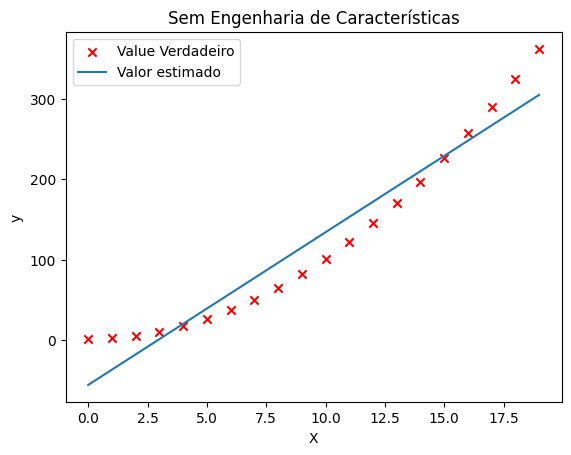

In [570]:
# inicializando parâmetros
w_inicial = np.array([0.0])
b_inicial = 0
# parâmetros para rodar o Método do Gradiente:
num_iters  = 2000
alpha      = 0.01
# Rodando o Método do gradiente
w_final, b_final, J_hist = metodo_do_gradiente(X, y, w_inicial, b_inicial,
                                                    calcula_custo, calcula_gradiente,
                                                    alpha, num_iters)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.scatter(x, y, marker='x', c='r', label="Value Verdadeiro"); plt.title("Sem Engenharia de Características")
plt.plot(x,X@w_final + b_final, label="Valor estimado");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Bem, como esperado, não obtivemos uma aproximação muito boa. O que precisamos é de algo como $y= w_0x_0^2 + b$, ou seja, de uma **característica polinomial** no nosso modelo.

Para obter isso, você pode modificar os *dados de entrada* para $criar$ as características desejadas. Abaixo, trocarmos `X` por `X**2` no código:

In [571]:
# Característica polinomial:
X = x**2
X = X.reshape(-1, 1) # X deve ser uma matriz 2-D

Iteração    0: Custo  7329.22   
Iteração 1000: Custo     0.22   
Iteração 2000: Custo     0.22   
Iteração 3000: Custo     0.22   
Iteração 4000: Custo     0.22   
Iteração 5000: Custo     0.22   
Iteração 6000: Custo     0.21   
Iteração 7000: Custo     0.21   
Iteração 8000: Custo     0.21   
Iteração 9000: Custo     0.21   
b,w encontrados pelo método do gradiente: 0.05,[1.004] 


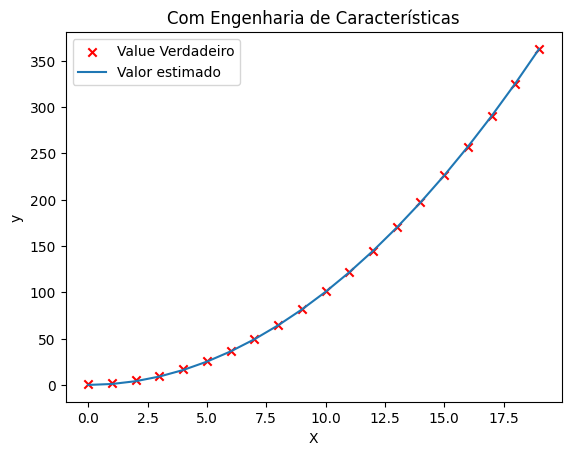

In [572]:
# inicializando parâmetros
w_inicial = np.array([0.0])
b_inicial = 0
# parâmetros para rodar o Método do Gradiente:
num_iters  = 10000
alpha      = 0.00001 # Veja que foi necessário reduzir o alpha drasticamente
# Rodando o Método do gradiente

w_final, b_final, J_hist = metodo_do_gradiente(X, y, w_inicial, b_inicial,
                                                    calcula_custo, calcula_gradiente,
                                                    alpha, num_iters)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.scatter(x, y, marker='x', c='r', label="Value Verdadeiro"); plt.title("Com Engenharia de Características")
plt.plot(x,X@w_final + b_final, label="Valor estimado");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Uma aproximação quase perfeita! Note que os valores obtidos para $\mathbf{w}$ e b foram: `b=0.05, w=1.004`.
O Método do Gradiente modificou nossos valores iniciais de forma a obter o modelo $y=0.05 + 1.004*x_0^2$, algo bem próximo do nosso alvo $y=1*x_0^2+1$.

### Selecionando Características

Acima, nós já sabíamos que o termo $x^2$ era necessário. Entretanto, nem sempre é óbvio quais características são necessárias. Uma ideia consiste em adicionar uma variedade de potenciais características para encontrar as mais úteis. Por exemplo, e se nós tentássemos: $y=w_0x_0 + w_1x_1^2 + w_2x_2^3+b$ ?

Rodando as células abaixo

In [573]:
# Criando os dados
x = np.arange(0, 20, 1)
y = x**2

# potenciais características:
X = np.c_[x, x**2, x**3]  # a função c_ faz a concatenação.


Iteração    0: Custo  1140.29   
Iteração 1000: Custo   328.54   
Iteração 2000: Custo   280.44   
Iteração 3000: Custo   239.39   
Iteração 4000: Custo   204.34   
Iteração 5000: Custo   174.43   
Iteração 6000: Custo   148.90   
Iteração 7000: Custo   127.10   
Iteração 8000: Custo   108.49   
Iteração 9000: Custo    92.61   
b,w encontrados pelo método do gradiente: 0.01,[0.082 0.536 0.028] 


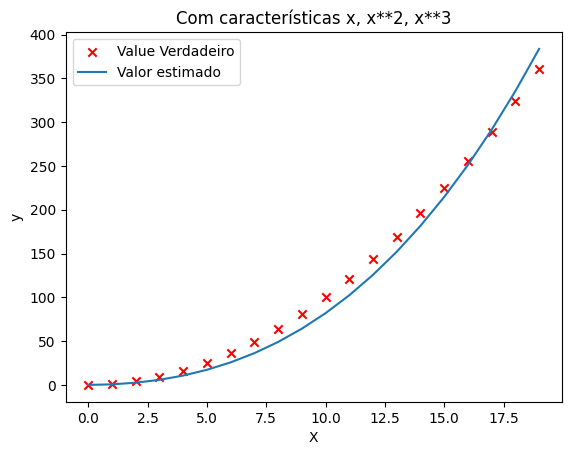

In [574]:
# inicializando parâmetros
m,n       = X.shape
w_inicial = np.zeros((n,))
b_inicial = 0
# parâmetros para rodar o Método do Gradiente:
num_iters  = 10000
alpha      = 0.0000001 # Veja que foi necessário reduzir o alpha ainda mais
# Rodando o Método do gradiente

w_final, b_final, J_hist = metodo_do_gradiente(X, y, w_inicial, b_inicial,
                                                    calcula_custo, calcula_gradiente,
                                                    alpha, num_iters)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.scatter(x, y, marker='x', c='r', label="Value Verdadeiro"); plt.title("Com características x, x**2, x**3")
plt.plot(x,X@w_final + b_final, label="Valor estimado");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Note o valor de $\mathbf{w}$, `[0.08 0.54 0.03]` e b é `0.01`.Isso implica que o modelo após o treinamento é :
$$ 0.08x + 0.54x^2 + 0.03x^3 + 0.01 $$
O Método do Gradiente enfatizou que os dados são melhor explicados pelo termo $x^2$, aumentando o valor de $w_1$ em relação aos outros parâmetros.  
> O Método do Gradiente está escolhendo as características 'corretas' para nós enfatizando o parâmetro associado.

Vamos revisar as ideias principais:
- O valor menor para um parâmetro implica que esse parâmetro é menos importante. No caso extremo, quando o peso do parâmetro é zero ou muito próximo de zero, a característica associada é inútil para modelar os dados.
- Acima, após o treinamento, o peso associado com a característica $x^2$ foi muito maior que os pesos associados a $x$ ou $x^3$, uma vez que essa característica é a mais útil para explicar o comportamento dos dados

### Escalonamento de Características

Conforme descrito no último código, se os dados têm características com diferentes ordens de grandeza, é recomendável aplicar o escalonamento de características para tornar o processo de treinamento mais rápido. No exemplo acima, tem-se os termos $x$, $x^2$ e $x^3$, que naturalmente possuem escalas bastante diferentes. Vamos então aplicar a normalização Z-Score

In [575]:
# Criando os dados alvo
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3] # c_ concatena os dados
print(f"Intervalo pico a pico por característica/coluna nos dados originais  :{np.ptp(X,axis=0)}")


# Fazendo normalização Z-Score
X, X_mu, X_sigma = normalizacao_zscore(X)
print(X.shape)
print(f"Intervalo pico a pico por característica/coluna nos dados escalonados:{np.ptp(X,axis=0)}")

Intervalo pico a pico por característica/coluna nos dados originais  :[  19  361 6859]
(20, 3)
Intervalo pico a pico por característica/coluna nos dados escalonados:[3.295 3.181 3.283]


Iteração    0: Custo  3852.70   
Iteração 1000: Custo     2.48   
Iteração 2000: Custo     1.12   
Iteração 3000: Custo     0.51   
Iteração 4000: Custo     0.23   
Iteração 5000: Custo     0.10   
Iteração 6000: Custo     0.05   
Iteração 7000: Custo     0.02   
Iteração 8000: Custo     0.01   
Iteração 9000: Custo     0.00   
b,w encontrados pelo método do gradiente: 123.50,[  0.546 112.103   0.875] 


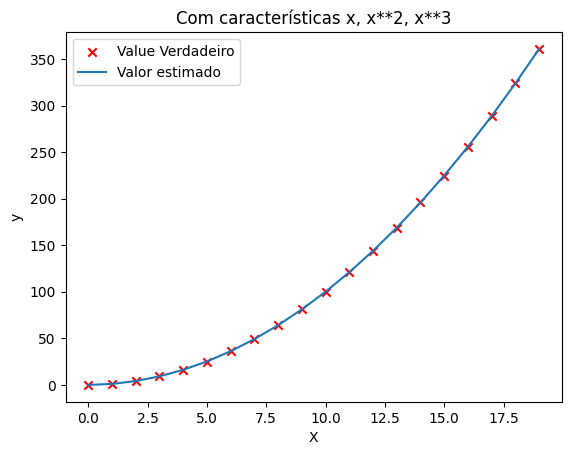

In [576]:
# inicializando parâmetros
m,n       = X.shape
w_inicial = np.zeros((n,))
b_inicial = 0
# parâmetros para rodar o Método do Gradiente:
num_iters  = 10000
alpha      = 0.3
# Rodando o Método do gradiente

w_final, b_final, J_hist = metodo_do_gradiente(X, y, w_inicial, b_inicial,
                                                    calcula_custo, calcula_gradiente,
                                                    alpha, num_iters)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.scatter(x, y, marker='x', c='r', label="Value Verdadeiro"); plt.title("Com características x, x**2, x**3")
plt.plot(x,X@w_final + b_final, label="Valor estimado");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Novamente, após o treinamento, o peso associado com a característica $x^2$ é muito maior em comparação com os pesos associados com $x$ e $x^3$.

### Funções complexas

Com a engenharia de características, até mesmo funções complexas podem ser modeladas:

Iteração    0: Custo     0.22   
Iteração 50000: Custo     0.02   
Iteração 100000: Custo     0.02   
Iteração 150000: Custo     0.02   
Iteração 200000: Custo     0.02   
Iteração 250000: Custo     0.02   
Iteração 300000: Custo     0.02   
Iteração 350000: Custo     0.02   
Iteração 400000: Custo     0.02   
Iteração 450000: Custo     0.02   
b,w encontrados pelo método do gradiente: -0.01,[ -2.241  -4.795  17.578   4.077  -9.136 -12.086  -7.406  -0.068   6.064
   8.76    7.095   0.982  -9.197] 


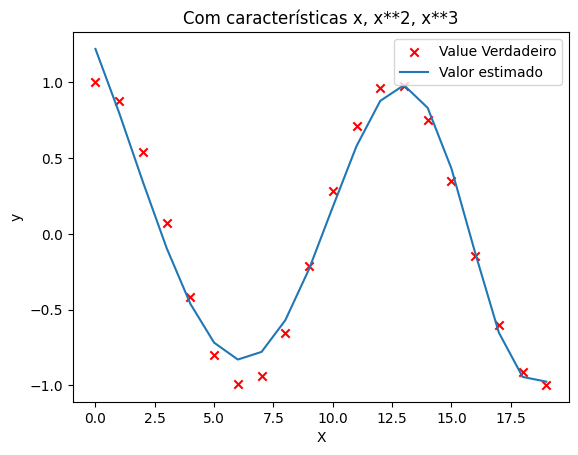

In [577]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X, X_mu, X_sigma = normalizacao_zscore(X)

# inicializando parâmetros
m,n       = X.shape
w_inicial = np.zeros((n,))
b_inicial = 0
# parâmetros para rodar o Método do Gradiente:
num_iters = 500000
alpha      = 0.1 # Veja que foi necessário reduzir o alpha ainda mais
# Rodando o Método do gradiente

w_final, b_final, J_hist = metodo_do_gradiente(X, y, w_inicial, b_inicial,
                                                    calcula_custo, calcula_gradiente,
                                                    alpha, num_iters)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.scatter(x, y, marker='x', c='r', label="Value Verdadeiro"); plt.title("Com características x, x**2, x**3")
plt.plot(x,X@w_final + b_final, label="Valor estimado");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()



## Parabéns!
Com este código, você:
- aprendeu como a regressão linear é capaz de modelar funções complexas, até mesmo funções altamente não lineares usando engenharia de características
- reconheceu que é importante aplicar escalonamento de características ao fazer engenharia de características

### Happy Hour - Respondendo a parte 2 da atividade de aula

##### Implementação dos algoritmos não vistos em sala de aula

In [578]:
def rmsprop(X, y, w_in, b_in, alpha, num_iters, calcula_custo, calcula_gradiente, beta=0.9, epsilon=1e-8):
    """
    Aplica o método RMSProp para ajustar w, b para problemas multivariados.

    Argumentos da função:
      X (ndarray (m, n))  : Conjunto de dados com m exemplos e n características
      y (ndarray (m,))    : Valores alvo de saída
      w_in (ndarray (n,)) : Valores iniciais para os parâmetros w (vetor)
      b_in (escalar)      : Valor inicial para o parâmetro b
      alpha (float)       : Taxa de aprendizado
      num_iters (int)     : Número de iterações
      calcula_custo       : Função para calcular o custo
      calcula_gradiente   : Função para calcular o gradiente
      beta (float)        : Fator de decaimento para RMSProp (geralmente próximo de 0.9)
      epsilon (float)     : Pequeno valor para evitar divisão por zero no cálculo do gradiente (geralmente 1e-8)

    Retorna:
      w (ndarray (n,))    : Valor atualizado de w
      b (scalar)          : Valor atualizado de b
      J_history (list)    : Histórico dos valores de custo
    """

    # Inicializar variáveis
    J_history = []
    w = w_in
    b = b_in
    
    # Inicialização de acumuladores de gradiente como vetores do tamanho de w
    v_dw = np.zeros_like(w)  # Vetor do mesmo tamanho que w
    v_db = 0  # b é escalar

    for i in range(num_iters):
        # Calcula o gradiente
        dj_db, dj_dw = calcula_gradiente(X, y, w, b)

        # Atualiza os acumuladores RMSProp para w e b (element-wise para w)
        v_dw = beta * v_dw + (1 - beta) * (dj_dw**2)
        v_db = beta * v_db + (1 - beta) * (dj_db**2)

        # Atualiza os parâmetros w e b
        w = w - alpha * dj_dw / (np.sqrt(v_dw) + epsilon)
        b = b - alpha * dj_db / (np.sqrt(v_db) + epsilon)

        # Armazena o custo para cada iteração
        J_history.append(calcula_custo(X, y, w, b))
        
        # Exibe o progresso em intervalos regulares
        if i % (num_iters // 10) == 0 or i == num_iters - 1:
            print(f"Iteração {i:4d}: Custo {J_history[-1]:8.2f}")

    return w, b, J_history


def sgd(X, y, w_in, b_in, alpha, num_iters, calcula_custo, calcula_gradiente):
    """
    Aplica o Método do Gradiente Estocástico (SGD) para ajustar w, b.

    Argumentos da função:
      X (ndarray (m, n))   : Conjunto de dados com m exemplos e n características
      y (ndarray (m,))     : Valores alvo de saída
      w_in (ndarray (n,))  : Valores iniciais para os parâmetros w (vetor)
      b_in (scalar)        : Valor inicial para o parâmetro b
      alpha (float)        : Taxa de aprendizado
      num_iters (int)      : Número de iterações
      calcula_custo        : Função para calcular o custo
      calcula_gradiente    : Função para calcular o gradiente

    Retorna:
      w (ndarray (n,))     : Valor atualizado de w
      b (scalar)           : Valor atualizado de b
      J_history (list)     : Histórico dos valores de custo
    """

    # Inicializar variáveis
    J_history = []
    b = b_in
    w = w_in
    m = len(y)  # Número de amostras

    for i in range(num_iters):
        # Embaralhar os dados a cada iteração
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Atualiza w e b para cada exemplo de treinamento
        for j in range(m):
            # Seleciona uma única amostra (vetor de características e valor alvo)
            x_i = X_shuffled[j]   # Vetor (n,)
            y_i = y_shuffled[j]   # Escalar

            # Calcula o gradiente para essa amostra
            dj_db, dj_dw = calcula_gradiente(x_i.reshape(1, -1), np.array([y_i]), w, b)

            # Atualiza os parâmetros w e b
            w = w - alpha * dj_dw
            b = b - alpha * dj_db

        # Armazena o custo após a passagem por todo o conjunto de dados
        J_history.append(calcula_custo(X, y, w, b))

        # Exibe o progresso em intervalos regulares
        if i % (num_iters // 10) == 0 or i == num_iters - 1:
            print(f"Iteração {i:4d}: Custo {J_history[-1]:8.2f}")

    return w, b, J_history


def gradiente_conjugado(x, y, w_in, b_in, alpha, num_iters, calcula_custo, calcula_gradiente, tol=1e-8):
    """
    Método de Gradiente Conjugado para ajuste de w e b.

    Argumentos:
      x (ndarray (m, n))  : Conjunto de dados com m amostras e n características
      y (ndarray (m,))    : Valores alvo de saída
      w_in (ndarray (n,)) : Vetor inicial para os parâmetros w
      b_in (scalar)       : Valor inicial para o parâmetro b
      alpha (float)       : Tamanho de passo ou taxa de aprendizado
      num_iters (int)     : Número de iterações
      calcula_custo       : Função para calcular o custo
      calcula_gradiente   : Função para calcular o gradiente
      tol (float)         : Tolerância para critério de parada

    Retorna:
      w (ndarray (n,))    : Valor atualizado de w
      b (scalar)          : Valor atualizado de b
      J_history (list)    : Histórico dos valores de custo
    """
    w = w_in
    b = b_in
    J_history = []

    g_prev_w = np.zeros(len(w))
    g_prev_b = 0
    p_w = -g_prev_w  # Inicializa como negativo do gradiente
    p_b = -g_prev_b

    for t in range(1, num_iters + 1):
        # Calcula o gradiente para w e b
        dj_db, dj_dw = calcula_gradiente(x, y, w, b)

        # Critério de parada baseado na norma do gradiente
        if np.sqrt(np.sum(dj_dw ** 2)) < tol and abs(dj_db) < tol:
            print(f"Convergência atingida na iteração {t}.")
            break

        # Primeira iteração - p inicial é o negativo do gradiente
        if t == 1:
            p_w = -dj_dw
            p_b = -dj_db
        else:
            # Computa beta_t usando o método Polak-Ribiére
            if np.dot(g_prev_w, g_prev_w) != 0:  # Prevenir divisão por zero
                beta_t = np.dot(dj_dw, dj_dw - g_prev_w) / np.dot(g_prev_w, g_prev_w)
            else:
                beta_t = 0  # Ou outra abordagem
            
            p_w = -dj_dw + beta_t * p_w
            p_b = -dj_db + beta_t * p_b

        # Atualiza os parâmetros
        w += alpha * p_w
        b += alpha * p_b

        # Calcula o custo e armazena no histórico
        J_history.append(calcula_custo(x, y, w, b))

        # Atualiza o gradiente anterior
        g_prev_w = dj_dw
        g_prev_b = dj_db

        # Exibe o progresso em intervalos regulares
        if t % (num_iters // 10) == 0 or t == num_iters - 1:
            print(f"Iteração {t:4d}: Custo {J_history[-1]:8.2f}")

    return w, b, J_history


def adam(x, y, w_in, b_in, alpha, beta1, beta2, epsilon, num_iters, calcula_custo, calcula_gradiente):
    """
    Aplica o algoritmo Adam para otimização de w e b em um cenário multivariado.

    Argumentos:
      x (ndarray): Conjunto de dados com m amostras e n características.
      y (ndarray): Valores alvo de saída.
      w_in (ndarray): Valores iniciais para os parâmetros w (vetor de pesos).
      b_in (scalar): Valor inicial para o parâmetro b (intercepto).
      alpha (float): Taxa de aprendizado.
      beta1 (float): Exponencial para a média dos gradientes.
      beta2 (float): Exponencial para a média dos gradientes ao quadrado.
      epsilon (float): Pequeno valor para evitar divisão por zero.
      num_iters (int): Número total de iterações.
      calcula_custo: Função que calcula o custo.
      calcula_gradiente: Função que calcula o gradiente.

    Retorna:
      w (ndarray): Valor otimizado de w (vetor de pesos).
      b (scalar): Valor otimizado de b (intercepto).
      J_history (list): Histórico dos valores de custo.
    """
    w = w_in
    b = b_in
    m_w, v_w = np.zeros_like(w), np.zeros_like(w)  # Inicialização dos momentos de w
    m_b, v_b = 0, 0  # Inicialização dos momentos de b

    J_history = []

    for t in range(1, num_iters + 1):
        # Calcula o gradiente
        dj_db, dj_dw = calcula_gradiente(x, y, w, b)

        # Atualiza as médias e variâncias dos gradientes (momentos)
        m_w = beta1 * m_w + (1 - beta1) * dj_dw
        m_b = beta1 * m_b + (1 - beta1) * dj_db

        v_w = beta2 * v_w + (1 - beta2) * (dj_dw ** 2)
        v_b = beta2 * v_b + (1 - beta2) * (dj_db ** 2)

        # Correções de bias
        m_w_corrigido = m_w / (1 - beta1 ** t)
        m_b_corrigido = m_b / (1 - beta1 ** t)
        v_w_corrigido = v_w / (1 - beta2 ** t)
        v_b_corrigido = v_b / (1 - beta2 ** t)

        # Atualiza os parâmetros
        w -= alpha * (m_w_corrigido / (np.sqrt(v_w_corrigido) + epsilon))
        b -= alpha * (m_b_corrigido / (np.sqrt(v_b_corrigido) + epsilon))

        # Armazena o custo atual
        J_history.append(calcula_custo(x, y, w, b))
        
        # Exibe o progresso em intervalos regulares
        if t % (num_iters // 10) == 0 or t == num_iters - 1:
            print(f"Iteração {t:4d}: Custo {J_history[-1]:8.2f}   ")

    return w, b, J_history


#### Funções Auxiliares - Métricas de Avaliação de Problemas de Regressão

In [579]:
# poderia usar a scipy - mas sou programador raiz (mascador de abelhas)

def r_squared(y_true, y_pred):
    """
        Calcula o coeficiente de determinação R².
        Args:
            y_true (ndarray): valores verdadeiros de y
            y_pred (ndarray): valores preditos pelo modelo de y
        Returns:
            r2 (float): o valor do coeficiente de determinação
    """
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


def mean_absolute_error(y_true, y_pred):
    """
        Calcula o erro médio absoluto (MAE)
        Args:
            y_true (ndarray): valores verdadeiros de y
            y_pred (ndarray): valores preditos pelo modelo de y
        Returns:
            mae (float): o valor do erro médio absoluto
    """
    return np.mean(np.abs(y_true - y_pred))


def mean_squared_error(y_true, y_pred):
    """
        Calcula o erro quadrático médio (MSE).
        Args:
            y_true (ndarray): valores verdadeiros de y
            y_pred (ndarray): valores preditos pelo modelo de y
        Returns:
            mse (float): o valor do erro quadrático médio

    """
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    """
        Calcula a raiz do erro quadrático médio (RMSE).
        Args:
            y_true (ndarray): valores verdadeiros de y
            y_pred (ndarray): valores preditos pelo modelo de y
        Returns:
            rmse (float): o valor da raiz do do erro quadrático médio
    """
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    """
        Calcula o erro percentual absoluto médio (MAPE).
        Args:
            y_true (ndarray): valores verdadeiros de y
            y_pred (ndarray): valores preditos pelo modelo de y
        Returns:
            mape (float): o valor do erro percentual absoluto médio
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#### Preparação dos Dados - Série de Taylor de $e^x$

In [580]:
# tabela de dados

tabela = [["Algoritmo", "R^2", "MAE", "MSE", "RMSE", "MAPE"]]

# coeficientes do polinômio

coeffs = list()

for n in range(6, -1, -1):
    coeffs.append(1 / np.math.factorial(n))

x = np.linspace(-3, 3, 500)

# valor de y
y = np.polyval(np.array(coeffs), x)

# vetor de catacterísticas
X_raw = np.c_[x, x ** 2, x ** 3, x ** 4, x ** 5, x ** 6]

X, _, _ = normalizacao_zscore(X_raw) 

##### Série de Taylor de $e^x$ - Resolução - Método do Gradiente

Iteração    0: Custo    10.09   
Iteração  500: Custo     0.00   
Iteração 1000: Custo     0.00   
Iteração 1500: Custo     0.00   
Iteração 2000: Custo     0.00   
Iteração 2500: Custo     0.00   
Iteração 3000: Custo     0.00   
Iteração 3500: Custo     0.00   
Iteração 4000: Custo     0.00   
Iteração 4500: Custo     0.00   
b,w encontrados pelo método do gradiente: 3.33,[1.748 1.371 1.676 0.846 0.641 0.282] 


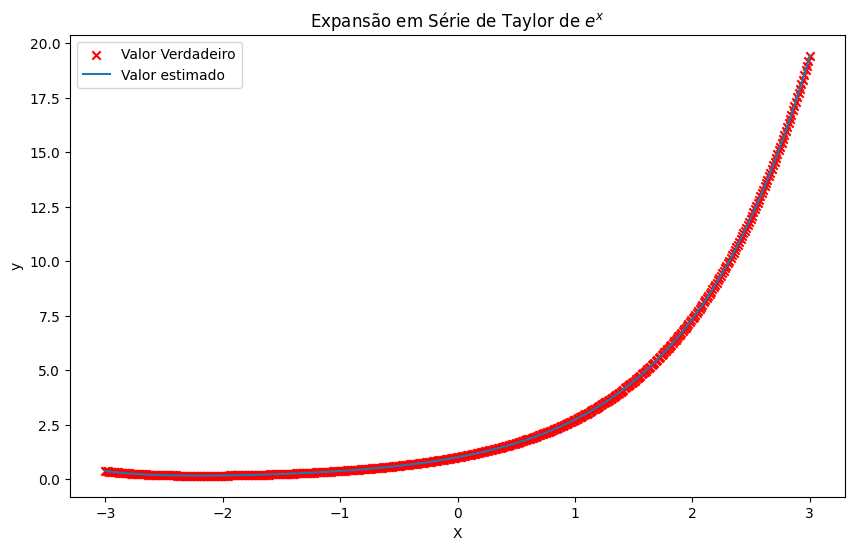

In [581]:

# inicializando parâmetros
m,n       = X.shape
w_inicial = np.zeros((n,))
b_inicial = 0
# parâmetros para rodar o Método do Gradiente:
num_iters = 5000
alpha      = 0.1 # Otimizado usando VC (Vai Cavalo!!!)
# Rodando o Método do gradiente

w_final, b_final, J_hist = metodo_do_gradiente(X, y, w_inicial, b_inicial,
                                                    calcula_custo, calcula_gradiente,
                                                    alpha, num_iters)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='x', c='r', label="Valor Verdadeiro")
plt.title("Expansão em Série de Taylor de $e^x$")
plt.plot(x,X@w_final + b_final, label="Valor estimado")
plt.xlabel("X")
plt.ylabel("y") 
plt.legend()
plt.show()

##### Série de Taylor de $e^x$ - Custo x Iteração - Método do Gradiente

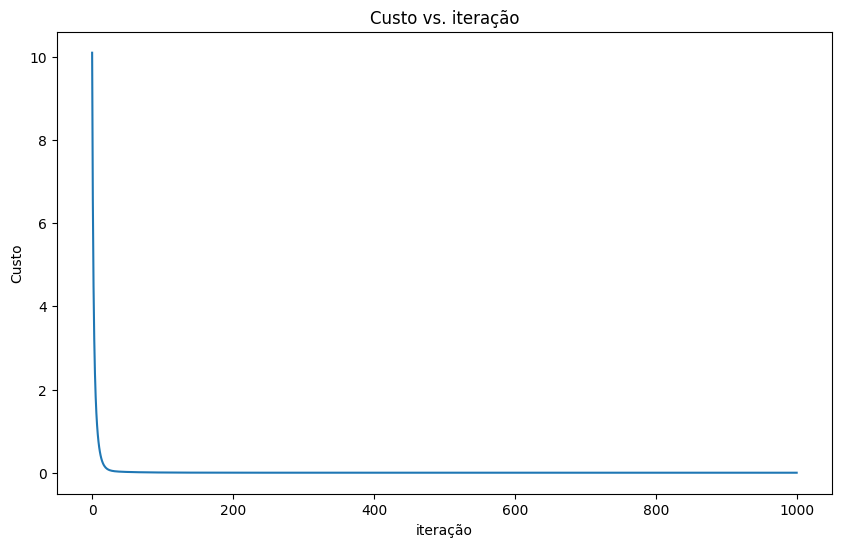

In [582]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(J_hist[0:1000])
plt.title("Custo vs. iteração")
plt.ylabel('Custo')
plt.xlabel('iteração')
plt.show()

##### Série de Taylor de $e^x$ - Resíduos - Método do Gradiente

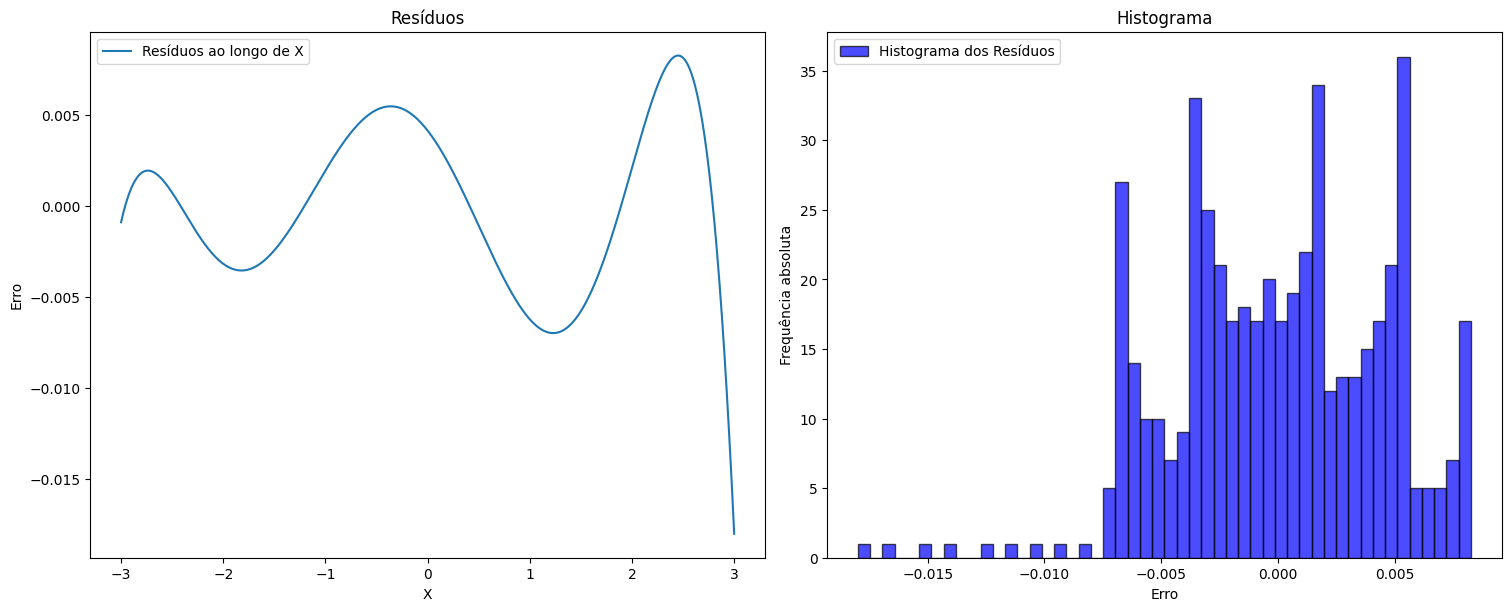

In [583]:
y_pred = X@w_final + b_final

tabela.append(["Método do Gradiente", 
               "{:.6e}".format(r_squared(y, y_pred)), 
               "{:.6e}".format(mean_absolute_error(y, y_pred)),
               "{:.6e}".format(mean_squared_error(y, y_pred)),
               "{:.6e}".format(root_mean_squared_error(y, y_pred)),
               "{:.6e}".format(mean_absolute_percentage_error(y, y_pred))])


e = y - y_pred

# Plotando os resultados
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(15, 6))

ax1.plot(x, 
         e, 
         label="Resíduos ao longo de X")

ax2.hist(e,
            bins=50,
            density=False,
            alpha=0.7,
            color="blue",
            edgecolor='black',
            label="Histograma dos Resíduos")

ax1.set_title("Resíduos");  

ax2.set_title("Histograma")

ax1.set_ylabel('Erro')             

ax2.set_ylabel('Frequência absoluta')

ax1.set_xlabel('X')

ax2.set_xlabel('Erro')

ax1.legend()

ax2.legend()

plt.show()


##### Série de Taylor de $e^x$ - Resolução - RMSProp

Iteração    0: Custo    16.03
Iteração  500: Custo     0.35
Iteração 1000: Custo     0.00
Iteração 1500: Custo     0.00
Iteração 2000: Custo     0.00
Iteração 2500: Custo     0.00
Iteração 3000: Custo     0.00
Iteração 3500: Custo     0.00
Iteração 4000: Custo     0.00
Iteração 4500: Custo     0.00
Iteração 4999: Custo     0.00
b,w encontrados pelo método do RMSProp: 3.34,[1.733 1.35  1.709 0.909 0.614 0.246] 


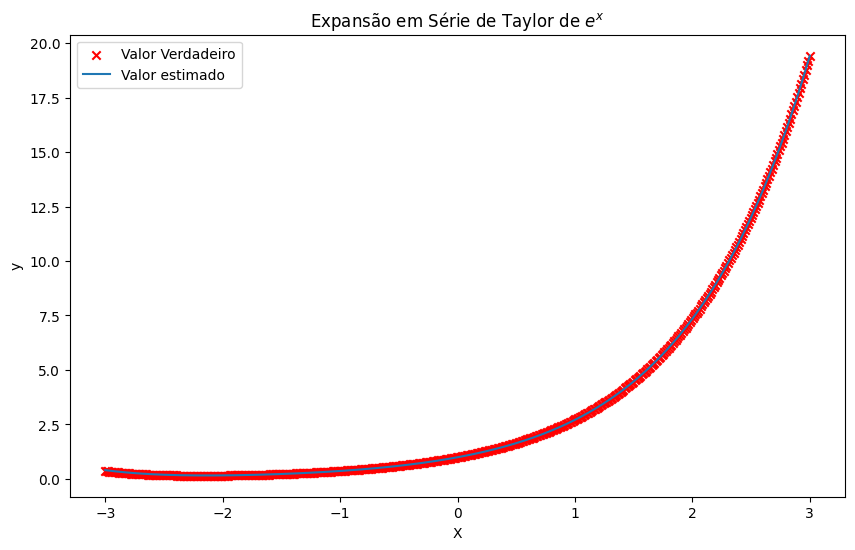

In [584]:
alpha      = 0.005 # Otimizado usando VC (Vai Cavalo!!!)
# Rodando o Método do gradiente
w_final, b_final, J_hist = rmsprop(X, y, w_inicial, b_inicial, alpha, num_iters,
                                                    calcula_custo, calcula_gradiente)

print(f"b,w encontrados pelo método do RMSProp: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='x', c='r', label="Valor Verdadeiro") 
plt.title("Expansão em Série de Taylor de $e^x$")
plt.plot(x,X@w_final + b_final, label="Valor estimado")  
plt.xlabel("X") 
plt.ylabel("y") 
plt.legend() 
plt.show()

##### Série de Taylor de $e^x$ - Custo x Iteração - RMSProp

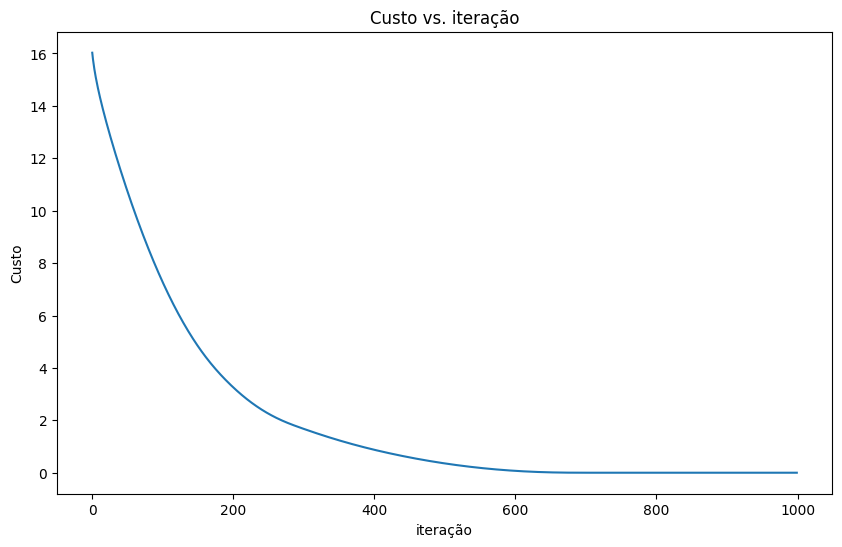

In [585]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(J_hist[0:1000])
plt.title("Custo vs. iteração")
plt.ylabel('Custo')
plt.xlabel('iteração')
plt.show()

##### Série de Taylor de $e^x$ - Resíduos - RMSProp

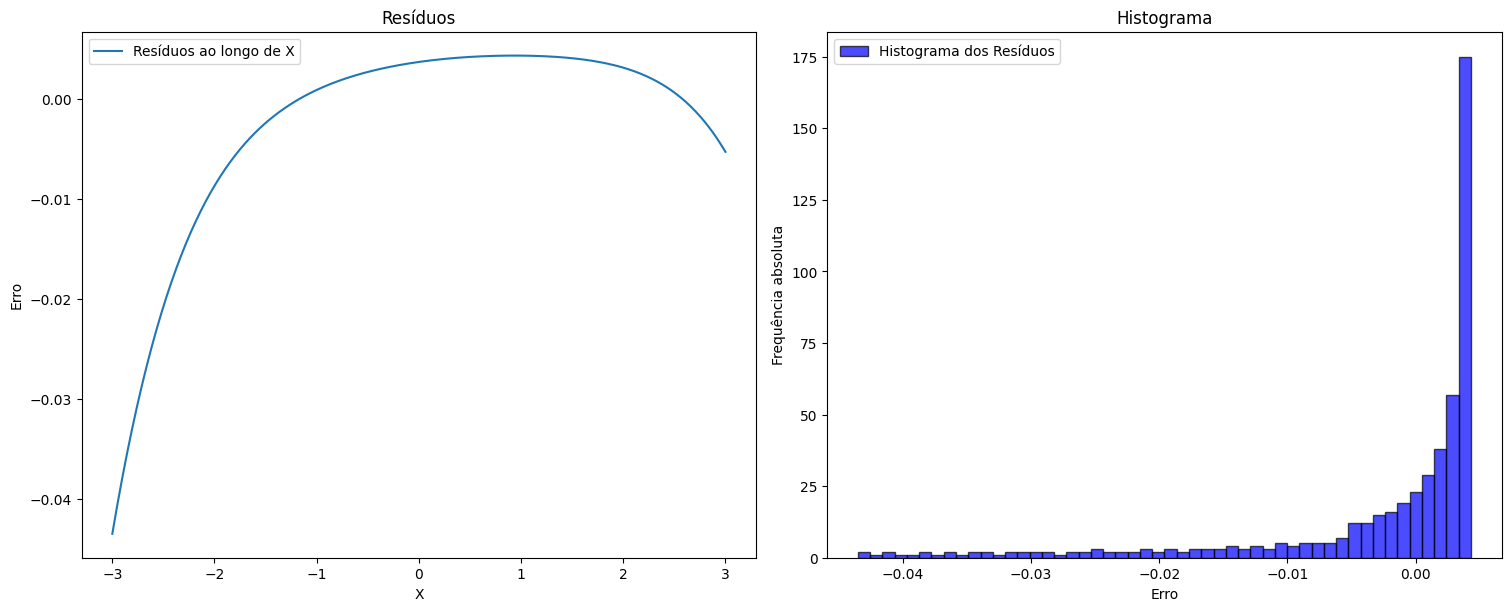

In [586]:
y_pred = X@w_final + b_final

tabela.append(["RMSProp", 
               "{:.6e}".format(r_squared(y, y_pred)), 
               "{:.6e}".format(mean_absolute_error(y, y_pred)),
               "{:.6e}".format(mean_squared_error(y, y_pred)),
               "{:.6e}".format(root_mean_squared_error(y, y_pred)),
               "{:.6e}".format(mean_absolute_percentage_error(y, y_pred))])


e = y - y_pred

# Plotando os resultados
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(15, 6))

ax1.plot(x, 
         e, 
         label="Resíduos ao longo de X")

ax2.hist(e,
            bins=50,
            density=False,
            alpha=0.7,
            color="blue",
            edgecolor='black',
            label="Histograma dos Resíduos")

ax1.set_title("Resíduos");  

ax2.set_title("Histograma")

ax1.set_ylabel('Erro')             

ax2.set_ylabel('Frequência absoluta')

ax1.set_xlabel('X')

ax2.set_xlabel('Erro')

ax1.legend()

ax2.legend()

plt.show()


##### Série de Taylor de $e^x$ - Resolução - SGD

Iteração    0: Custo     0.49
Iteração  500: Custo     0.00
Iteração 1000: Custo     0.00
Iteração 1500: Custo     0.00
Iteração 2000: Custo     0.00
Iteração 2500: Custo     0.00
Iteração 3000: Custo     0.00
Iteração 3500: Custo     0.00
Iteração 4000: Custo     0.00
Iteração 4500: Custo     0.00
Iteração 4999: Custo     0.00
b,w encontrados pelo método SGD: 3.33,[1.736 1.347 1.711 0.907 0.617 0.244] 


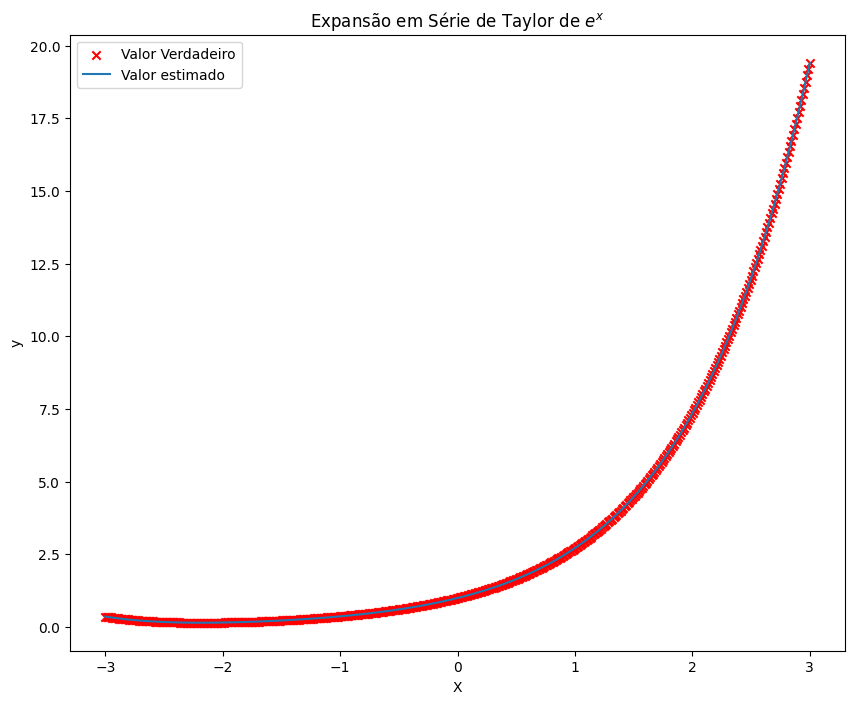

In [587]:

alpha      = 0.1 # Otimizado usando VC (Vai Cavalo!!!)
# Rodando o Método do gradiente
w_final, b_final, J_hist = sgd(X, y, w_inicial, b_inicial, alpha, num_iters,
                                                    calcula_custo, calcula_gradiente)

print(f"b,w encontrados pelo método SGD: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.figure(figsize=(10, 8))
plt.scatter(x, y, marker='x', c='r', label="Valor Verdadeiro")
plt.title("Expansão em Série de Taylor de $e^x$")
plt.plot(x,X@w_final + b_final, label="Valor estimado")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

##### Série de Taylor de $e^x$ - Custo x Iteração - SGD

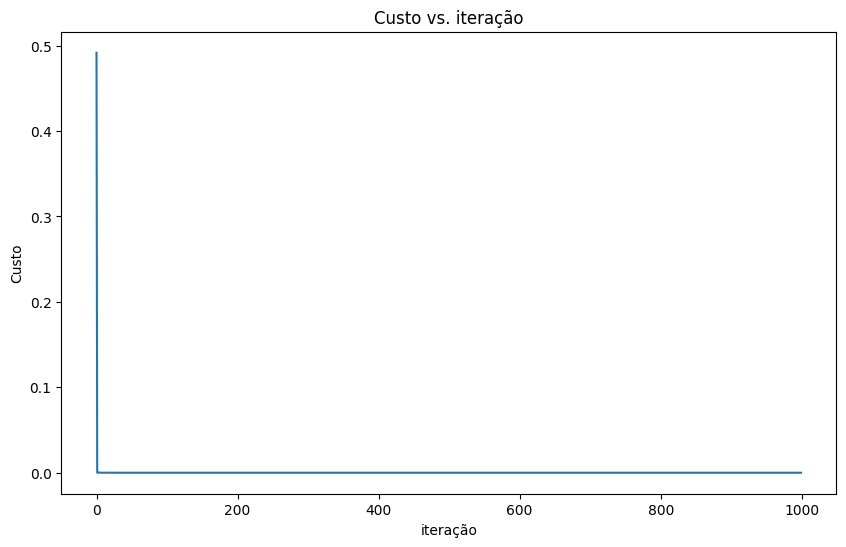

In [588]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(J_hist[0:1000])
plt.title("Custo vs. iteração")
plt.ylabel('Custo')
plt.xlabel('iteração')
plt.show()

##### Série de Taylor de $e^x$ - Resíduos - SGD

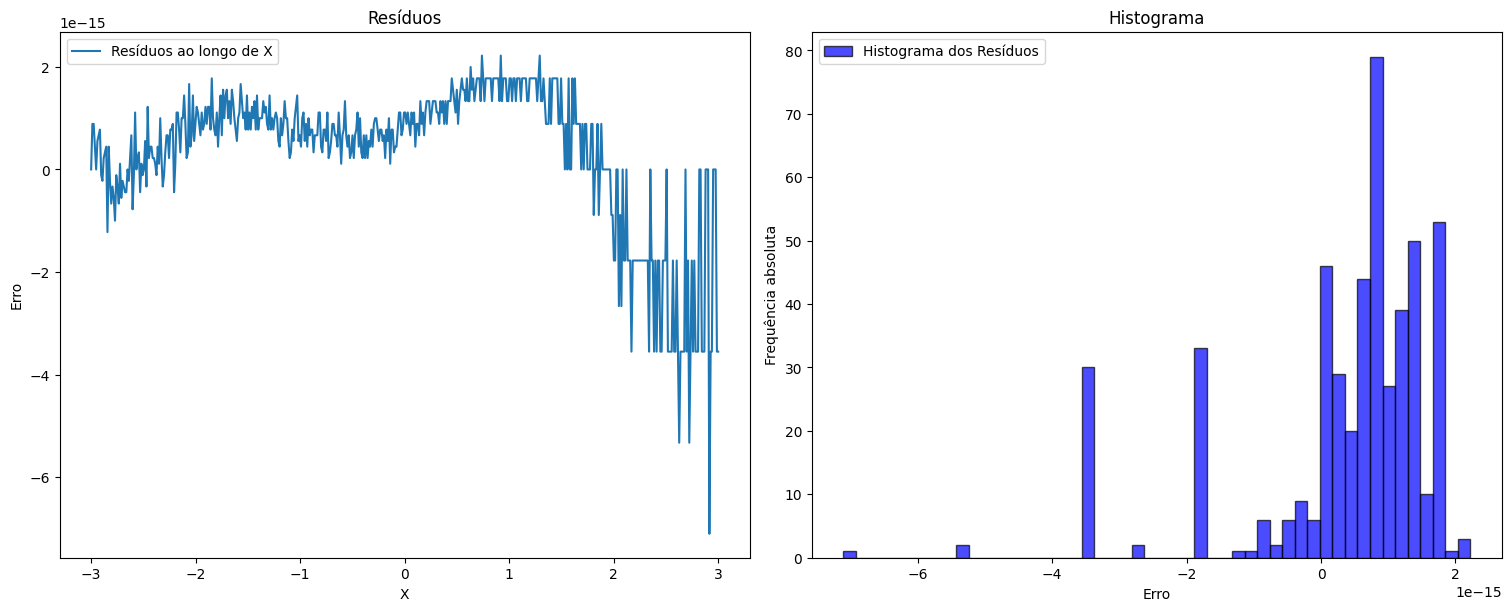

In [589]:
y_pred = X@w_final + b_final

tabela.append(["SGD", 
               "{:.6e}".format(r_squared(y, y_pred)), 
               "{:.6e}".format(mean_absolute_error(y, y_pred)),
               "{:.6e}".format(mean_squared_error(y, y_pred)),
               "{:.6e}".format(root_mean_squared_error(y, y_pred)),
               "{:.6e}".format(mean_absolute_percentage_error(y, y_pred))])


e = y - y_pred

# Plotando os resultados
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(15, 6))

ax1.plot(x, 
         e, 
         label="Resíduos ao longo de X")

ax2.hist(e,
            bins=50,
            density=False,
            alpha=0.7,
            color="blue",
            edgecolor='black',
            label="Histograma dos Resíduos")

ax1.set_title("Resíduos");  

ax2.set_title("Histograma")

ax1.set_ylabel('Erro')             

ax2.set_ylabel('Frequência absoluta')

ax1.set_xlabel('X')

ax2.set_xlabel('Erro')

ax1.legend()

ax2.legend()

plt.show()


##### Série de Taylor de $e^x$ - Resolução - Gradiente Conjugado

Iteração  500: Custo     0.02
Iteração 1000: Custo     0.01
Iteração 1500: Custo     0.00
Iteração 2000: Custo     0.00
Iteração 2500: Custo     0.00
Iteração 3000: Custo     0.00
Iteração 3500: Custo     0.00
Iteração 4000: Custo     0.00
Iteração 4500: Custo     0.00
Iteração 4999: Custo     0.00
Iteração 5000: Custo     0.00
b,w encontrados pelo método do Gradiente Conjugado: 3.33,[1.852 1.396 1.382 0.774 0.843 0.331] 


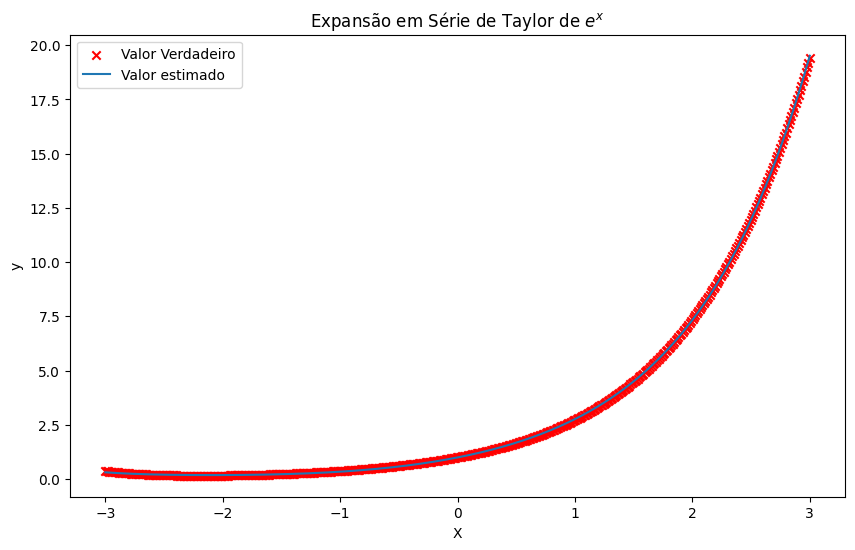

In [590]:
alpha      = 0.01 # Otimizado usando VC (Vai Cavalo!!!)
# Rodando o Método do gradiente
w_final, b_final, J_hist = gradiente_conjugado(X, y, w_inicial, b_inicial, alpha, num_iters,
                                                    calcula_custo, calcula_gradiente)

print(f"b,w encontrados pelo método do Gradiente Conjugado: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.figure(figsize=(10,6))
plt.scatter(x, y, marker='x', c='r', label="Valor Verdadeiro")
plt.title("Expansão em Série de Taylor de $e^x$")
plt.plot(x,X@w_final + b_final, label="Valor estimado")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

##### Série de Taylor de $e^x$ - Custo x Iteração - Gradiente Conjugado

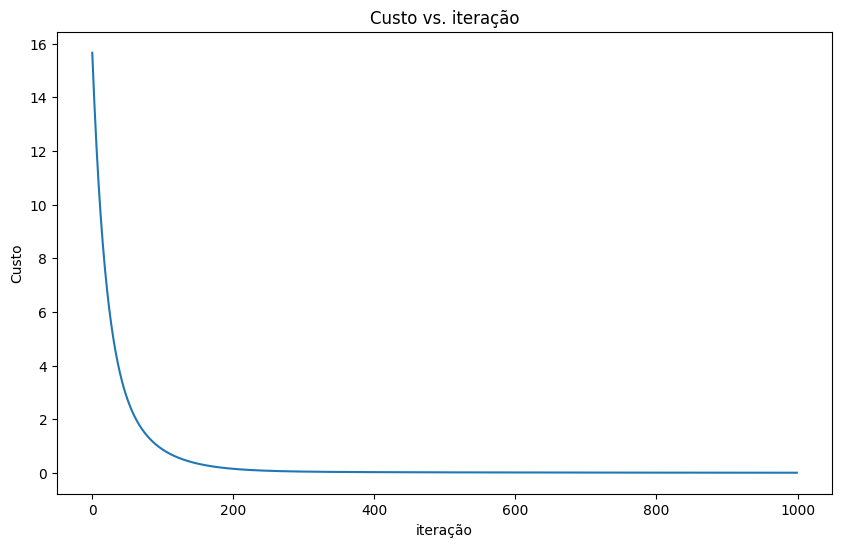

In [591]:
# Plotando os resultados
# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(J_hist[0:1000])
plt.title("Custo vs. iteração")
plt.ylabel('Custo')
plt.xlabel('iteração')
plt.show()

##### Série de Taylor de $e^x$ - Resíduos - Gradiente Conjugado

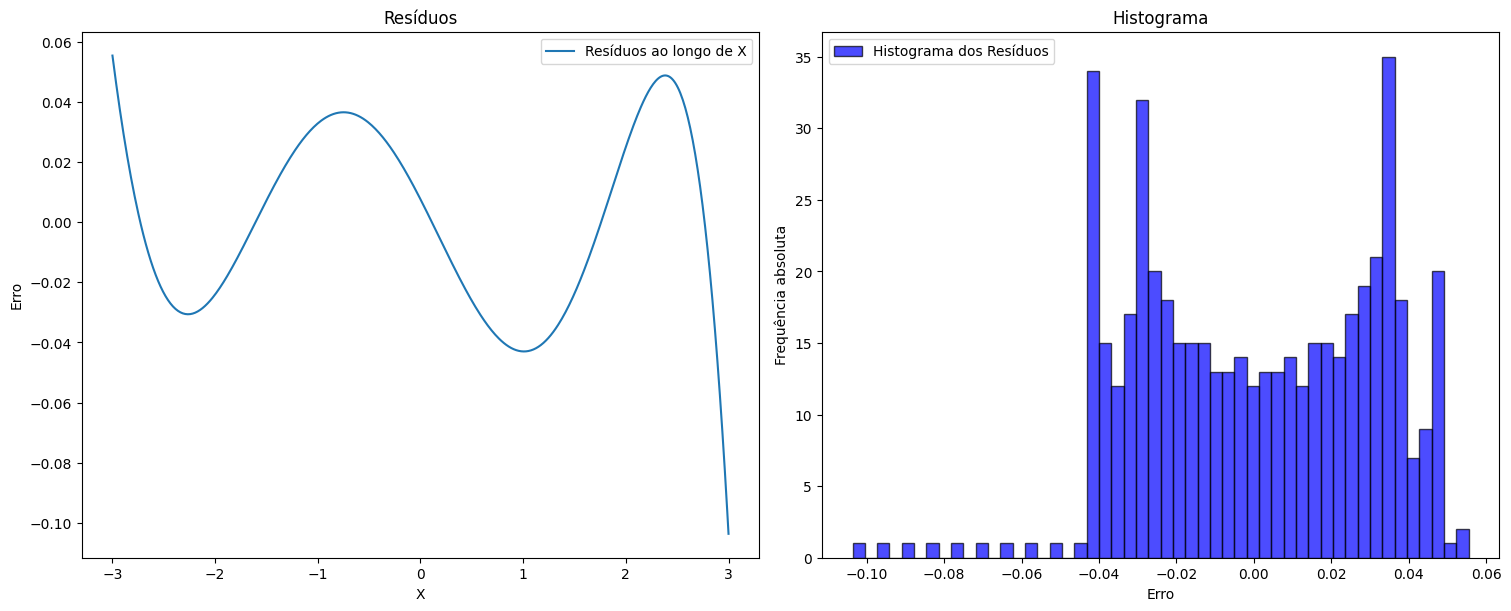

In [592]:
y_pred = X@w_final + b_final

tabela.append(["Gradiente Conjugado", 
               "{:.6e}".format(r_squared(y, y_pred)), 
               "{:.6e}".format(mean_absolute_error(y, y_pred)),
               "{:.6e}".format(mean_squared_error(y, y_pred)),
               "{:.6e}".format(root_mean_squared_error(y, y_pred)),
               "{:.6e}".format(mean_absolute_percentage_error(y, y_pred))])

e = y - y_pred

# Plotando os resultados
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(15, 6))

ax1.plot(x, 
         e, 
         label="Resíduos ao longo de X")

ax2.hist(e,
            bins=50,
            density=False,
            alpha=0.7,
            color="blue",
            edgecolor='black',
            label="Histograma dos Resíduos")

ax1.set_title("Resíduos");  

ax2.set_title("Histograma")

ax1.set_ylabel('Erro')             

ax2.set_ylabel('Frequência absoluta')

ax1.set_xlabel('X')

ax2.set_xlabel('Erro')

ax1.legend()

ax2.legend()

plt.show()


##### Série de Taylor de $e^x$ - Resolução - Adam

Iteração  500: Custo     0.00   
Iteração 1000: Custo     0.00   
Iteração 1500: Custo     0.00   
Iteração 2000: Custo     0.00   
Iteração 2500: Custo     0.00   
Iteração 3000: Custo     0.00   
Iteração 3500: Custo     0.00   
Iteração 4000: Custo     0.00   
Iteração 4500: Custo     0.00   
Iteração 4999: Custo     0.00   
Iteração 5000: Custo     0.00   
b,w encontrados pelo método Adam: 3.33,[1.736 1.347 1.711 0.907 0.617 0.244] 


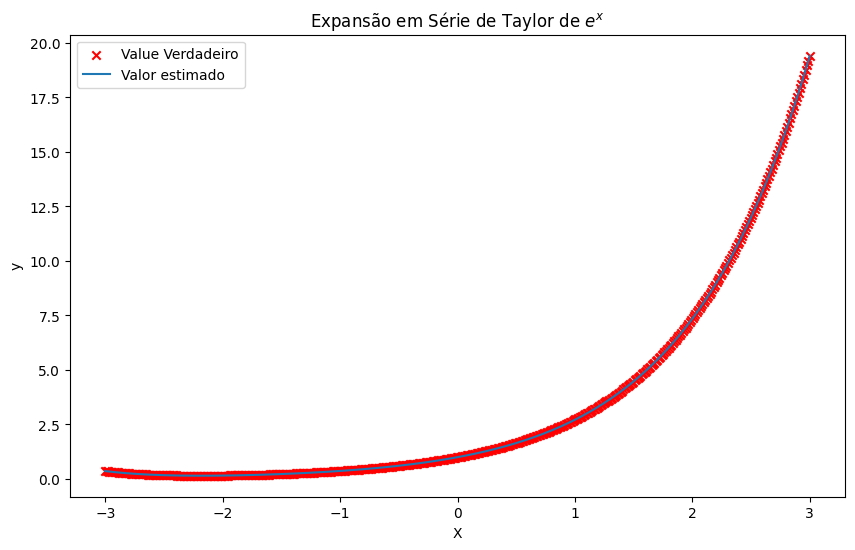

In [593]:
alpha  = 0.1 # otimizado usando VC (Vai Cavalo)
beta1 = 0.9 # otimizado usando VC (Vai Cavalo)
beta2 = 0.999 # otimizado usando VC (Vai Cavalo)
epsilon = 1e-8 # otimizado usando VC (Vai Cavalo)
# Rodando o Método do gradiente
w_final, b_final, J_hist = adam(X, y, w_inicial, b_inicial, alpha, beta1, beta2, epsilon, num_iters,
                                                    calcula_custo, calcula_gradiente)

print(f"b,w encontrados pelo método Adam: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.figure(figsize=(10,6))
plt.scatter(x, y, marker='x', c='r', label="Value Verdadeiro")
plt.title("Expansão em Série de Taylor de $e^x$")
plt.plot(x,X@w_final + b_final, label="Valor estimado")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

##### Série de Taylor de $e^x$ - Custo x Iteração - Adam

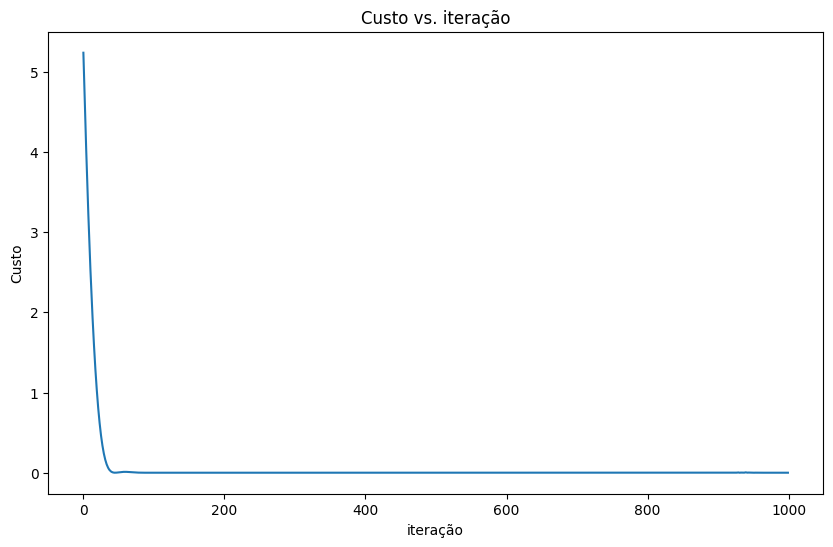

In [594]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(J_hist[0:1000])
plt.title("Custo vs. iteração")
plt.ylabel('Custo')
plt.xlabel('iteração')
plt.show()

##### Série de Taylor de $e^x$ - Resíduos - Adam

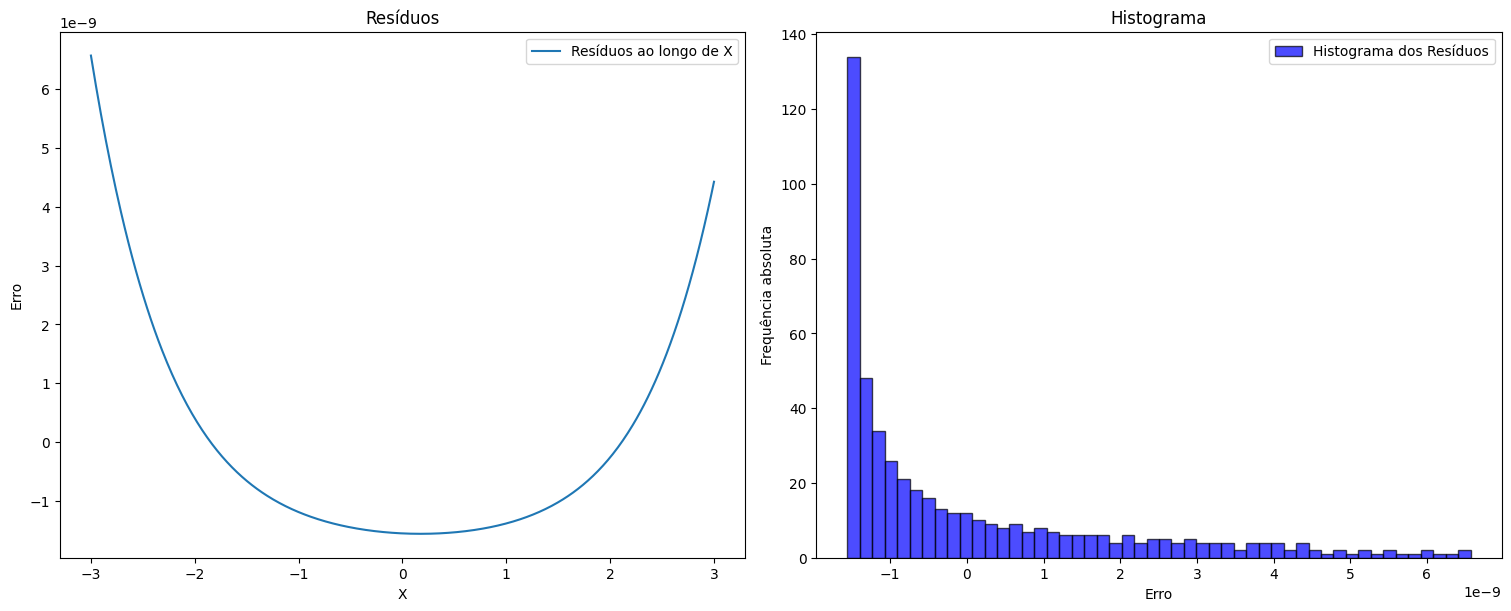

In [595]:
y_pred = X@w_final + b_final

tabela.append(["Adam", 
               "{:.6e}".format(r_squared(y, y_pred)), 
               "{:.6e}".format(mean_absolute_error(y, y_pred)),
               "{:.6e}".format(mean_squared_error(y, y_pred)),
               "{:.6e}".format(root_mean_squared_error(y, y_pred)),
               "{:.6e}".format(mean_absolute_percentage_error(y, y_pred))])

e = y - y_pred

# Plotando os resultados
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(15, 6))

ax1.plot(x, 
         e, 
         label="Resíduos ao longo de X")

ax2.hist(e,
            bins=50,
            density=False,
            alpha=0.7,
            color="blue",
            edgecolor='black',
            label="Histograma dos Resíduos")

ax1.set_title("Resíduos");  

ax2.set_title("Histograma")

ax1.set_ylabel('Erro')             

ax2.set_ylabel('Frequência absoluta')

ax1.set_xlabel('X')

ax2.set_xlabel('Erro')

ax1.legend()

ax2.legend()

plt.show()


##### Avaliação das Métricas de Desempenho

In [596]:
print(tabulate(tabela))

-------------------  ------------  ------------  ------------  ------------  ------------
Algoritmo            R^2           MAE           MSE           RMSE          MAPE
Método do Gradiente  9.999991e-01  3.686821e-03  2.003419e-05  4.475956e-03  4.978349e-01
RMSProp              9.999948e-01  6.417738e-03  1.131204e-04  1.063581e-02  2.206082e+00
SGD                  1.000000e+00  1.143308e-15  2.144494e-30  1.464409e-15  1.630600e-13
Gradiente Conjugado  9.999581e-01  2.619891e-02  9.064274e-04  3.010693e-02  4.551151e+00
Adam                 1.000000e+00  1.499102e-09  3.591848e-18  1.895217e-09  3.181859e-07
-------------------  ------------  ------------  ------------  ------------  ------------


## Discussão e Conclusões

Com base na tabela que compara o desempenho de diferentes algoritmos usando as métricas de regressão, podemos fazer as seguintes observações sobre a **qualidade do ajuste** e **performance** de cada algoritmo:

##### **Coeficiente de Determinação ($R^2$)**
- **$R^2$** mede o quão bem o modelo ajusta os dados. Valores próximos de 1 indicam um ajuste quase perfeito.
- Todos os algoritmos apresentados têm valores de $R^2$ muito próximos de 1, o que indica que eles ajustam bem os dados.
- **SGD** e **Adam** são os mais precisos, com $R^2$ igual a 1 (ajuste perfeito).

##### **Erro Médio Absoluto (MAE)**
- O **MAE** mede o erro médio entre as previsões e os valores reais, sem considerar a direção (positivo ou negativo).
- O **SGD** apresenta o menor **MAE** (praticamente zero), o que significa que suas previsões estão muito próximas dos valores reais.
- O **Método do Gradiente** e o **Adam** também possuem MAE muito baixos, mostrando razoável precisão.
- O **Gradiente Conjugado** apresenta o maior **MAE**, o que indica que suas previsões estão mais distantes dos valores reais em comparação com os outros algoritmos.

##### **Erro Quadrático Médio (MSE)**
- O **MSE** penaliza grandes erros, sendo sensível a valores aberrantes.
- O **SGD** tem um valor praticamente nulo de **MSE**, o que reforça sua precisão.
- O **Adam** também se aproxima dessa perfeição.
- O **Gradiente Conjugado** apresenta o maior valor de MSE, indicando maiores desvios quadráticos.

##### **Raiz do Erro Quadrático Médio (RMSE)**
- O **RMSE** é a raiz quadrada do MSE, sendo uma métrica interpretável na mesma unidade dos dados originais.
- O **SGD** apresenta o menor **RMSE**, o que significa que o erro médio das previsões é muito pequeno.
- O **Método do Gradiente** e o **Adam** também têm valores baixos, mas superiores ao valor apresentado pelo **SGD**.
- O **Gradiente Conjugado** novamente apresenta o maior RMSE, indicando maiores desvios quadráticos.

##### **Erro Percentual Absoluto Médio (MAPE)**
- O **MAPE** mede o erro absoluto médio como uma porcentagem dos valores reais.
- **SGD** e **Adam** apresentam valores de MAPE insignificantes, indicando que as previsões são precisas em termos percentuais.
- O **RMSProp** e o **Gradiente Conjugado** têm valores de MAPE mais altos, especialmente o **RMSProp**, sugerindo menor precisão percentual.

#### Conclusões Gerais

- **SGD** e **Adam** apresentam os **melhores desempenhos** em termos de precisão e ajuste aos dados, com erros praticamente nulos em todas as métricas.
- O **Método do Gradiente** tem desempenho inferior a **SGD** e **Adam**.
- **RMSProp** e **Gradiente Conjugado** apresentam os piores resultados, com erros elevados em todas as métricas, indicando que suas previsões têm menor precisão.

### **Escolha do Algoritmo:**
- **SGD** seria uma excelente escolha se o objetivo for o menor erro possível, em todas as métricas.
- **Adam** é uma escolha sólida.
- **RMSProp** e **Gradiente Conjugado** podem ser evitados neste caso específico, devido ao desempenho inferior.

Esses resultados demonstram que, para o conjunto de dados em questão, **SGD** e **Adam** são os algoritmos mais adequados para o objetivo do exercício.

